In [1]:
import os
import copy
import pickle
import numpy as np
import glob

# matplotlib
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

# astropy
from astropy.io import fits
from astropy.nddata import Cutout2D
from astropy.utils.data import download_file
from astropy.coordinates import SkyCoord, Angle
from astropy import wcs
from astropy.table import Table,vstack
import astropy.units as u
import matplotlib.pyplot as plt 

import sncosmo

import sys
# so can find module one dir back; don't need to explicitly put .py into each subfolder 
sys.path.append("../..")
from candels_galaxy_surveys import galaxy_catalog,galaxy_survey
import update_galaxy_survey

# so can find script for host ellipses 
sys.path.append("../../visualize_hosts/")
from sn_cutout import ellipse

In [2]:
candels = pickle.load(open('delz_candels.pkl','rb'))

In [7]:
GND12Whe = candels[-4]

delz = GND12Whe[0]
nearby = GND12Whe[1][1]
host = GND12Whe[1][2]
lc = GND12Whe[1][3]

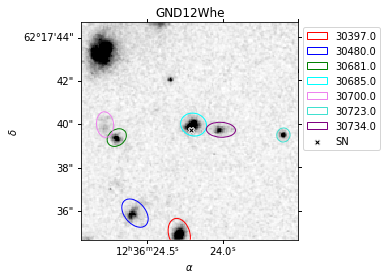

In [12]:
nick = GND12Whe[1][0]['name'] 
# the SN skycoord location
sn_loc = SkyCoord(GND12Whe[1][0]['RA'],GND12Whe[1][0]['DEC'],unit = (u.hourangle,u.deg))


# updating the surveys
update_near = update_galaxy_survey.update_survey(nearby)
update_host = update_galaxy_survey.update_survey(host[0])

# renaming for clarity
nearby = update_near
host = [update_host,host[1],host[2]]

# getting list of the ids, elliptical parameters for each nearby for this SN
ids = [i for i in nearby.mass[nearby.ids]]
nearby_coords = [i for i in nearby.gal_skycoords()]
a_ellipse = [np.float(i) for i in nearby.photom[nearby.a_ellip]]
b_ellipse = [np.float(i) for i in nearby.photom[nearby.b_ellip]]
theta_ellipse = [np.float(i) for i in nearby.photom[nearby.theta_ellip]]
gal_sources = [nearby.source]*len(nearby.photom)

# 5 element list, each element another x element list for a given SN with the x candidate parameters.
possible_hosts = [nearby_coords, a_ellipse, b_ellipse, theta_ellipse,ids,gal_sources]

# the ellipse 2nd argument wants a list with the x candidate parameters all together 
# ie not [[all coords], [all a], [all b], [all theta]] rather [[coords,a,b,theta],...]
possible_hosts = list(zip(possible_hosts[0],possible_hosts[1],possible_hosts[2],possible_hosts[3],possible_hosts[4],possible_hosts[5]))

ellipse(nick.lower()+'10x10.fits',possible_hosts,sn_loc,title=nick,save=False,show=True,diverging=False,logscale=False,val_min = -.009,val_max = .0585 )

In [14]:
from astropy.table import hstack
hstack([nearby.mass[nearby.ids,nearby.redshift_names],nearby.physpar[nearby.zspec,nearby.zphot,nearby.dz_l95,nearby.dz_u95]])

id,z,z_spec,z_peak,l95,u95
str8,str8,str12,str12,str12,str12
30397,1.0100,-1.0000,1.0050,0.880,1.087
30480,1.3300,-1.0000,1.3277,1.230,1.448
30681,1.5100,-1.0000,1.5092,1.383,1.637
30685,1.9700,-1.0000,1.9729,1.743,2.151
30700,1.3600,-1.0000,1.3622,1.151,1.567
30723,0.3700,-1.0000,0.3721,0.102,0.616
30734,2.3500,-1.0000,2.3471,2.151,2.517


## Published as CC at specz ~ 1.335 based on possible [OII doublet] 
## CC class from color-color/color-mags 
## W-H ~ 1 still too blue even for most CC 

## The host is clear don't need to update that 

## The evernote host photoz ~ 1.87 = [1.37,2.39] disagrees with the specz 

## My catalog has photz ~ 1.97 = [1.743,2.151] disagrees with the specz even more

## Not sure if the spectral feature is solid enough to trust, it is said conditions weren't great and that the spectrum may not be secure based on disagreement with photoz

## Would be best to double check. Also note the wheeler lc fit using the host photo z as prior shows IIP(SDSS-017862), P(II)=1.00,  z=1.978 in good agreement with the zpeak of my catalogs object

## https://arxiv.org/pdf/1401.7978.pdf